In [1]:
# CMSC 726: Machine Learning Course at UMD
# Instructor: Soheil Feizi

# imports
import numpy as np
import scipy as sc
import numpy.linalg as LA
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# generating data

m = 1000
x1 = np.random.randn(m,1)
y = x1 * 2 + 3 + 0.5* np.random.randn(m,1) 

Text(0,0.5,'y')

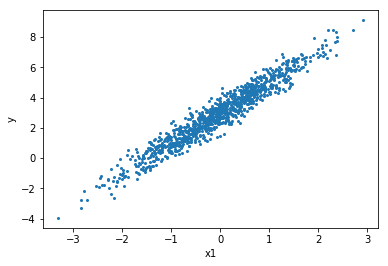

In [3]:
plt.plot(x1,y,'o',markersize=2)
plt.xlabel('x1')
plt.ylabel('y')

In [4]:
# defining the cost function
def compute_cost(x1,y,theta):
       return np.sum(np.power(y-theta[1]*x1-theta[0],2))/2

In [5]:
# input features
x0 = np.ones([m,1])
X = np.asmatrix(np.stack([x0,x1],axis=1))

In [6]:
# computing optimal parameters using the closed form formula
x0 = np.ones([m,1])
X=np.asmatrix(np.stack([x0,x1],axis=1))
theta_opt=LA.inv(np.transpose(X)*X)*np.transpose(X)*(np.asmatrix(y))
theta_opt=np.asarray(theta_opt)
print('optimal theta = ', theta_opt[0], theta_opt[1])

('optimal theta = ', array([3.01053619]), array([1.99957494]))


In [7]:
print("minimum cost = ", compute_cost(x1,y,theta_opt))

('minimum cost = ', 137.02283895942898)


Text(0,0.5,'y')

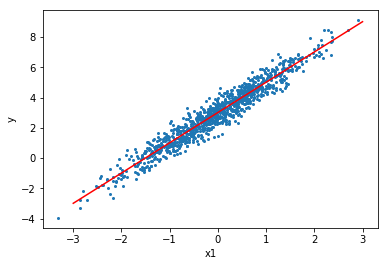

In [8]:
plt.plot(x1,y,'o',markersize=2)
plt.hold
plt.plot([-3,3], np.array([-3,3])*theta_opt[1] + theta_opt[0],'r')

plt.xlabel('x1')
plt.ylabel('y')

Gradient Descent:

In [9]:
def gradient_step(theta_current, x1, y, learning_rate):
    grad_theta1 = 0
    grad_theta0 = 0

    #Calculate Gradient
    for i in range(0, len(x1)):
        grad_theta1 +=  x1[i] * (y[i] - (theta_current[1] * x1[i] + theta_current[0]))
        grad_theta0 +=  (y[i] - (theta_current[1] * x1[i] + theta_current[0]))
    
    #Update theta
    theta_updated = theta_current + learning_rate * np.array([grad_theta0,grad_theta1])
        
    return theta_updated

In [10]:
# initializations

theta_GD = np.random.randn(2,1)
learning_rate = 1e-5
num_iterations = 1000

In [11]:
# gradient descent
cost_vec = []
for i in range(num_iterations):

    cost_vec.append(compute_cost(x1, y, theta_GD))
    theta_GD = gradient_step(theta_GD, x1, y, learning_rate)

Text(0,0.5,'cost')

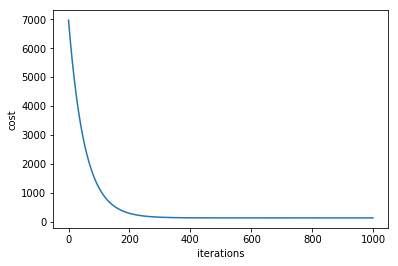

In [12]:
plt.plot(cost_vec)
plt.xlabel('iterations')
plt.ylabel('cost')

In [13]:
theta_GD

array([[3.01032781],
       [1.999323  ]])

Text(0,0.5,'y')

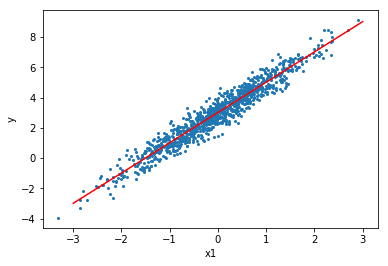

In [14]:
plt.plot(x1,y,'o',markersize=2)
plt.hold
plt.plot([-3,3], np.array([-3,3])*theta_GD[1] + theta_GD[0],'r')

plt.xlabel('x1')
plt.ylabel('y')